In [146]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


drive.mount('/content/drive/')
data_path = '/content/drive/MyDrive/Colab Notebooks/'
arima_data = pd.read_csv(data_path + 'conformal_results010.csv')
bnn_data = pd.read_csv(data_path + 'conformal_bnn_results.csv')
price_data = pd.read_csv(data_path + 'aggregated_data_10_minute_intervals.csv')
print(arima_data)
print(bnn_data)
arima_data = arima_data.iloc[32:].reset_index()
bnn_data = bnn_data.iloc[:-2]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
      Unnamed: 0         lower         upper       pred
0          11584  47169.427636  47521.502364  47345.465
1          11585  47093.274328  47445.335672  47269.305
2          11586  47457.335191  47809.514809  47633.425
3          11587  47243.621190  47595.828810  47419.725
4          11588  47199.139868  47551.330132  47375.235
...          ...           ...           ...        ...
3531       15115  42802.405102  43186.364898  42994.385
3532       15116  42662.585801  43046.544199  42854.565
3533       15117  42757.700404  43141.649596  42949.675
3534       15118  42689.366632  43073.303368  42881.335
3535       15119  42480.688414  42864.641586  42672.665

[3536 rows x 4 columns]
        threshold_time_ms      lower      upper       pred
0     2021-08-31 15:30:00  47262.773  48056.040  47297.613
1     2021-08-31 15:40:00  47181.570  47970.566  47403

In [217]:
def confidence_interval_gap(upper, lower):
    return upper - lower 

def confidence_interval_change(upper, lower, std_series):
    #The lower the better 
    std = std_series['mean']
    delta_ci = upper - lower 
    diff = []
    for i in range(upper.keys().start, upper.keys().stop-1):
        num = delta_ci.loc[i+1] - delta_ci.loc[i]
        denom = std.loc[i+1] - std.loc[i]
        diff.append(num/denom)
    return -1 * sum(diff)

def expected_value_of_ci_change(upper, lower, std_series):
    #Put emphasis on the region of confidence interval that have large variance, and exaime the gap
    #The better ci is one that have small difference in places where the variance is high
    delta_ci = upper - lower 
    std = std_series['mean']
    exp = []
    normalization = 0
    for i in range(upper.keys().start, upper.keys().stop-1):
        exp.append(delta_ci.loc[i] * std.loc[i])
        normalization += std.loc[i]
    return np.array(exp)/normalization 

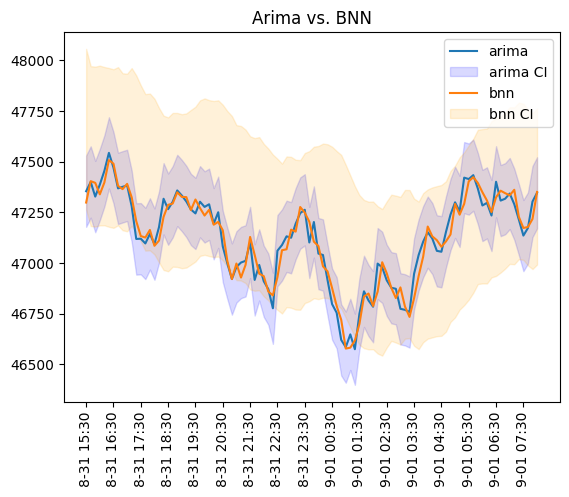

In [208]:
start = 0
end = 100
plt.plot(arima_data['pred'][start:end], label='arima')
plt.fill_between(arima_data.index[start:end], arima_data['lower'][start:end], arima_data['upper'][start:end], 
                 color='blue', alpha=.15, label='arima CI')
#plt.show()
plt.plot(bnn_data['pred'][start:end], label='bnn')
plt.fill_between(bnn_data.index[start:end], bnn_data['lower'][start:end], bnn_data['upper'][start:end], 
                 color='orange', alpha=.15, label='bnn CI')

plt.legend()

times = bnn_data['threshold_time_ms'][start:end:6].values
hours = [s[6:-3] for s in times]
plt.xticks(bnn_data.index[start:end:6], hours, rotation=90) 
plt.title('Arima vs. BNN')
plt.show()

Arima gap sum 35160.42996726568
BNN gap sum 75675.991


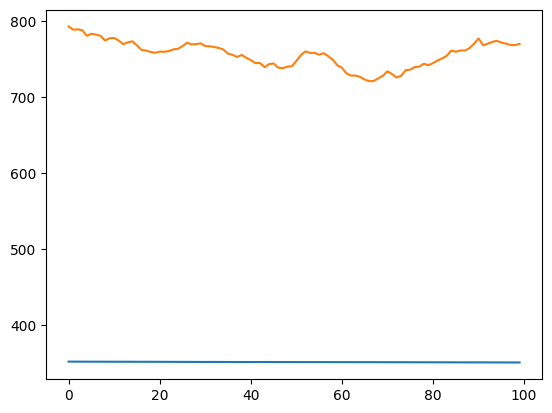

In [209]:
#Confidence Interval Gap 
gap_arima = confidence_interval_gap(arima_data['upper'][start:end], arima_data['lower'][start:end])
gap_bnn = confidence_interval_gap(bnn_data['upper'][start:end], bnn_data['lower'][start:end])

plt.plot(gap_arima)
plt.plot(gap_bnn)

print('Arima gap sum', sum(gap_arima))
print('BNN gap sum', sum(gap_bnn))

In [216]:
#Confidence Interval change 
rolling_std = price_data['mean'].rolling(20, min_periods=1).std()
std = rolling_std.iloc[int(arima_data.loc[0]['Unnamed: 0']):]
std = std.reset_index()

arima_change =  confidence_interval_change(arima_data['upper'], arima_data['lower'], std)
bnn_change =  confidence_interval_change(bnn_data['upper'], bnn_data['lower'], std)

print(arima_change)
print(bnn_change)

25.61738406755056
3037.2020980512134


In [220]:
#Expected CI 
arima_exp = expected_value_of_ci_change(arima_data['upper'], arima_data['lower'], std)
bnn_exp = expected_value_of_ci_change(bnn_data['upper'], bnn_data['lower'], std)

print(sum(arima_exp))
print(sum(bnn_exp))

372.6379137766867
680.7195111998348


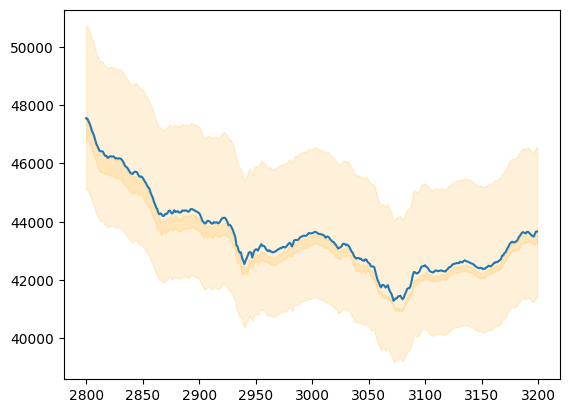

In [156]:
bnn_before = pd.read_csv(data_path + 'bnn_results.csv')
plt.plot(bnn_before['pred'][start:end], label='bnn')
plt.fill_between(bnn_before.index[start:end], bnn_before['lower'][start:end], bnn_before['upper'][start:end], 
                 color='orange', alpha=.15, label='bnn CI')
plt.fill_between(bnn_data.index[start:end], bnn_data['lower'][start:end], bnn_data['upper'][start:end], 
                 color='orange', alpha=.15, label='bnn CI')

['8-31 15:30',
 '8-31 16:00',
 '8-31 16:30',
 '8-31 17:00',
 '8-31 17:30',
 '8-31 18:00',
 '8-31 18:30',
 '8-31 19:00',
 '8-31 19:30',
 '8-31 20:00',
 '8-31 20:30',
 '8-31 21:00',
 '8-31 21:30',
 '8-31 22:00',
 '8-31 22:30',
 '8-31 23:00',
 '8-31 23:30',
 '9-01 00:00',
 '9-01 00:30',
 '9-01 01:00',
 '9-01 01:30',
 '9-01 02:00',
 '9-01 02:30',
 '9-01 03:00',
 '9-01 03:30',
 '9-01 04:00',
 '9-01 04:30',
 '9-01 05:00',
 '9-01 05:30',
 '9-01 06:00',
 '9-01 06:30',
 '9-01 07:00',
 '9-01 07:30',
 '9-01 08:00']

In [201]:
bnn_data['threshold_time_ms'][start:end:3].values

array(['2021-08-31 15:30:00', '2021-08-31 16:00:00',
       '2021-08-31 16:30:00', '2021-08-31 17:00:00',
       '2021-08-31 17:30:00', '2021-08-31 18:00:00',
       '2021-08-31 18:30:00', '2021-08-31 19:00:00',
       '2021-08-31 19:30:00', '2021-08-31 20:00:00',
       '2021-08-31 20:30:00', '2021-08-31 21:00:00',
       '2021-08-31 21:30:00', '2021-08-31 22:00:00',
       '2021-08-31 22:30:00', '2021-08-31 23:00:00',
       '2021-08-31 23:30:00', '2021-09-01 00:00:00',
       '2021-09-01 00:30:00', '2021-09-01 01:00:00',
       '2021-09-01 01:30:00', '2021-09-01 02:00:00',
       '2021-09-01 02:30:00', '2021-09-01 03:00:00',
       '2021-09-01 03:30:00', '2021-09-01 04:00:00',
       '2021-09-01 04:30:00', '2021-09-01 05:00:00',
       '2021-09-01 05:30:00', '2021-09-01 06:00:00',
       '2021-09-01 06:30:00', '2021-09-01 07:00:00',
       '2021-09-01 07:30:00', '2021-09-01 08:00:00'], dtype=object)